In [387]:
import matplotlib.pyplot as plt
import numpy as np


In [505]:
from courses.reversal_loop_circle import calc_two_circles_common_tangent_trajectory, calc_tangents_and_points

def plot_calc_two_circles_common_tangent_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse):
    
    trajectory = calc_two_circles_common_tangent_trajectory(R, r, step=0.1)
    trajectory_amplified = calc_two_circles_common_tangent_trajectory(R, r, step=0.1, amplitude=4.0)
    circle_x = R * np.cos(  np.linspace(0.0, 2 * np.pi, 100) ) 
    circle_y = R * np.sin(  np.linspace(0.0, 2 * np.pi, 100) )

    plt.plot( circle_x, circle_y, linestyle='--', color="black", label="enclosing circle")
    if sine_curve:
        
        plt.plot( trajectory.trajectory.T[0,:], reverse * trajectory.trajectory.T[1,:], label = "trajectory (No sine curve)" )
        plt.plot( trajectory_amplified.trajectory.T[0,:], reverse * trajectory_amplified.trajectory.T[1,:], label = "trajectory (With sine curve)", color ="orange" )
    else:
        plt.plot( trajectory.trajectory.T[0,:], reverse * trajectory.trajectory.T[1,:], label = "trajectory", color ="orange" )

    if sine_curve:
        dx = np.cos(reverse * trajectory_amplified.yaw)
        dy = np.sin(reverse * trajectory_amplified.yaw)
        arrow_indices = np.arange(0, len(trajectory_amplified.trajectory) - 1, 25)
        for i in arrow_indices:
            plt.quiver( trajectory_amplified.trajectory.T[0,i], reverse *trajectory_amplified.trajectory.T[1,i], dx[i], dy[i], angles='xy', scale_units='xy', scale=0.5, width=0.01, color='orange')
    else:
        dx = np.cos(reverse *trajectory.yaw)
        dy = np.sin(reverse *trajectory.yaw)
        arrow_indices = np.arange(0, len(trajectory.trajectory) - 1, 25)
        for i in arrow_indices:
            plt.quiver( trajectory.trajectory.T[0,i], reverse *trajectory.trajectory.T[1,i], dx[i], dy[i], angles='xy', scale_units='xy', scale=0.5, width=0.01, color='orange')

    center_1 = [-(R - r), 0.0]  # Center of the first circle
    center_2 = [(R - r), 0.0]  # Center of the second circle

    # Calculate tangents and contact points between the two circles
    tangents_and_points = calc_tangents_and_points(
        center_1[0], center_1[1], r, center_2[0], center_2[1], r
    )
    for tangent_and_point in tangents_and_points:
        contact_point1 = np.array([tangent_and_point["contact_point1"][0], tangent_and_point["contact_point1"][1]])
        contact_point2 = np.array([tangent_and_point["contact_point2"][0], tangent_and_point["contact_point2"][1]])
        t = np.linspace(0.0, 1.0 ,100).reshape(100,1)
        xy = t * contact_point1 + (1.0 - t) * contact_point2
        if contact_point1[0] * contact_point2[0] < 0.0 and contact_point1[1] * contact_point2[1] < 0.0 and reverse*contact_point1[1] > 0:
            plt.plot(xy.T[0,:], xy.T[1,:], color='gray', label="a line tangent to two circles", linewidth=5, alpha=0.25)

    circle_1_x = -(R - r) + r * np.cos(np.linspace(0.0, 2*np.pi,100))
    circle_1_y = r * np.sin(np.linspace(0.0, 2*np.pi,100))
    plt.plot(circle_1_x, circle_1_y, color='gray', linewidth=5, alpha=0.25)

    circle_2_x = (R - r) + r * np.cos(np.linspace(0.0, 2*np.pi,100))
    circle_2_y = r * np.sin(np.linspace(0.0, 2*np.pi,100))
    plt.plot(circle_2_x, circle_2_y, color='gray', linewidth=5, alpha=0.25)


    
    # 原点にマーカーを追加
    plt.plot(0, 0, 'o', color='black')  
    plt.text(3.0, 3.0, 'O', fontsize=10, color='black', ha='right', va='top')    
    plt.axis('equal')
    plt.axis('off')
    plt.legend(loc=location)
    plt.title(png_name)
    plt.savefig(f'{png_name}.png')
    plt.show()

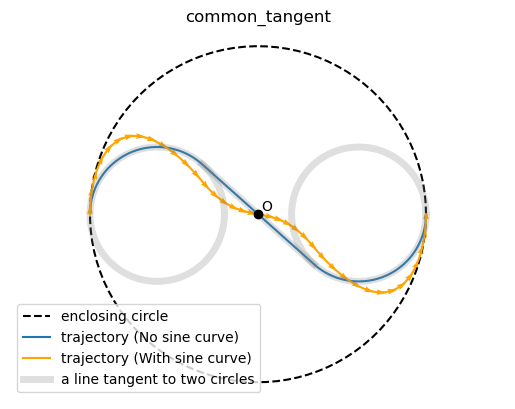

In [506]:
R = 35
r = 0.40 * R
amplitude = 4.0
sine_curve = True
png_name = "common_tangent"
location = 'lower left'
plot_calc_two_circles_common_tangent_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse = 1.0)

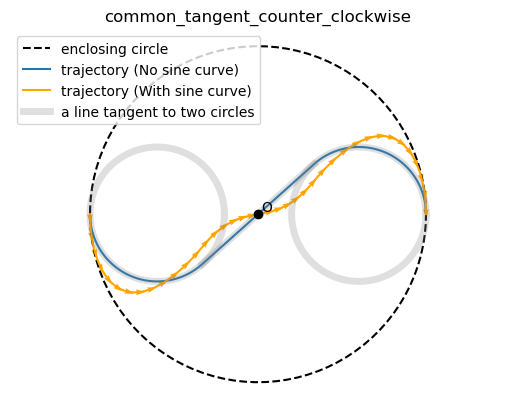

In [507]:
R = 35
r = 0.40 * R
amplitude = 4.0
sine_curve = True
png_name = "common_tangent_counter_clockwise"
location = 'upper left'
plot_calc_two_circles_common_tangent_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse = -1.0)

In [508]:
from courses.reversal_loop_circle import calc_two_circles_common_tangent_trajectory, calc_circum_circle_tangent_to_two_circles

def plot_calc_two_circles_common_tangent_circle(R, r, amplitude, png_name, sine_curve, location, reverse):
    
    trajectory = calc_two_circles_common_tangent_trajectory(R, r, step=0.1)
    trajectory_amplified = calc_two_circles_common_tangent_trajectory(R, r, step=0.1, amplitude=4.0)
    circle_x = R * np.cos(  np.linspace(0.0, 2 * np.pi, 100) ) 
    circle_y = R * np.sin(  np.linspace(0.0, 2 * np.pi, 100) )

    plt.plot( circle_x, circle_y, linestyle='--', color="black", label="enclosing circle")
    if sine_curve:
        
        plt.plot( trajectory.trajectory.T[0,:], reverse * trajectory.trajectory.T[1,:], label = "trajectory (No sine curve)" )
        plt.plot( trajectory_amplified.trajectory.T[0,:], reverse * trajectory_amplified.trajectory.T[1,:], label = "trajectory (With sine curve)", color ="orange" )
    else:
        plt.plot( trajectory.trajectory.T[0,:], reverse * trajectory.trajectory.T[1,:], label = "trajectory", color ="orange" )

    if sine_curve:
        dx = np.cos(reverse *trajectory_amplified.yaw)
        dy = np.sin(reverse *trajectory_amplified.yaw)
        arrow_indices = np.arange(0, len(trajectory_amplified.trajectory) - 1, 25)
        for i in arrow_indices:
            plt.quiver( trajectory_amplified.trajectory.T[0,i], reverse *trajectory_amplified.trajectory.T[1,i], dx[i], dy[i], angles='xy', scale_units='xy', scale=0.5, width=0.01, color='orange')
    else:
        dx = np.cos(reverse *trajectory.yaw)
        dy = np.sin(reverse *trajectory.yaw)
        arrow_indices = np.arange(0, len(trajectory.trajectory) - 1, 25)
        for i in arrow_indices:
            plt.quiver( trajectory.trajectory.T[0,i], reverse *trajectory.trajectory.T[1,i], dx[i], dy[i], angles='xy', scale_units='xy', scale=0.5, width=0.01, color='orange')

    # Define centers for the two circles
    center_1 = [-(R - R * 0.75), 0.0]  # Adjusted center of the first circle
    center_2 = [(R - R * 0.75), 0.0]  # Adjusted center of the second circle

    # Calculate tangents and contact points between the two circles
    (theta, (x_center, y_center), (contact_1_x, contact_1_y),(contact_2_x, contact_2_y),) = calc_circum_circle_tangent_to_two_circles( center_1[0], center_1[1], center_2[0], center_2[1], R * 0.75, r)
    
    circle_1_x = -(R - R * 0.75) + R * 0.75 * np.cos(np.linspace(0.0, 2*np.pi,100))
    circle_1_y = R * 0.75 * np.sin(np.linspace(0.0, 2*np.pi,100))
    plt.plot(circle_1_x, circle_1_y, color='gray', linewidth=5, alpha=0.25)

    circle_2_x = (R - R * 0.75) + R * 0.75 * np.cos(np.linspace(0.0, 2*np.pi,100))
    circle_2_y = R * 0.75 * np.sin(np.linspace(0.0, 2*np.pi,100))
    plt.plot(circle_2_x, circle_2_y, color='gray', linewidth=5, alpha=0.25)

    ex_circle_x = x_center + r * np.cos(np.linspace(-2 * theta, 2 * theta,100) + reverse * np.pi / 2)
    ex_circle_y = reverse * y_center + r * np.sin(np.linspace(-2 * theta, 2 * theta,100) + reverse * np.pi / 2)
    plt.plot(ex_circle_x, ex_circle_y, color='gray', linewidth=5, alpha=0.25, label = "a circle tangent to two circles")


    
    # 原点にマーカーを追加
    plt.plot(0, 0, 'o', color='black')  
    plt.text(3.0, 3.0, 'O', fontsize=10, color='black', ha='right', va='top')    
    plt.axis('equal')
    plt.axis('off')
    plt.legend(loc=location)
    plt.title(png_name)
    plt.savefig(f'{png_name}.png')
    plt.show()

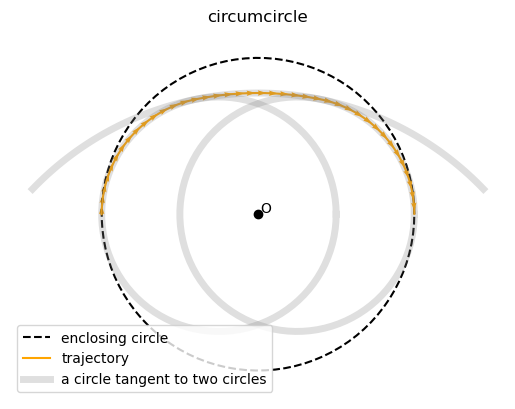

In [509]:
R = 35
r = 2.0 * R
amplitude = 4.0
sine_curve = False
png_name = "circumcircle"
location = 'lower left'
plot_calc_two_circles_common_tangent_circle(R, r, amplitude, png_name, sine_curve, location, reverse = 1.0)

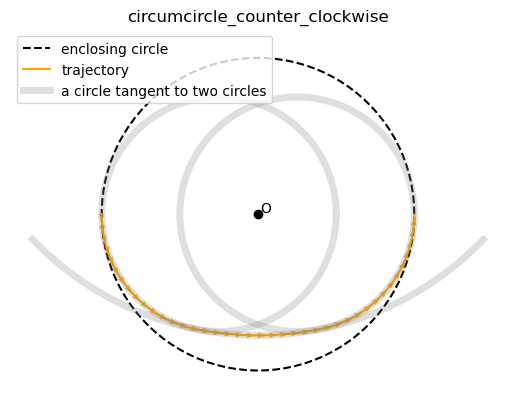

In [510]:
R = 35
r = 2.0 * R
amplitude = 4.0
sine_curve = False
png_name = "circumcircle_counter_clockwise"
location = 'upper left'
plot_calc_two_circles_common_tangent_circle(R, r, amplitude, png_name, sine_curve, location, reverse = -1.0)

In [511]:
from courses.reversal_loop_circle import calc_boundary_trajectory

def plot_calc_boundary_trajectory(R, png_name, location, reverse):
    
    trajectory = calc_boundary_trajectory(R)
    trajectory_amplified = calc_two_circles_common_tangent_trajectory(R, r, step=0.1, amplitude=4.0)
    circle_x = R * np.cos(  np.linspace(0.0, 2 * np.pi, 100) ) 
    circle_y = R * np.sin(  np.linspace(0.0, 2 * np.pi, 100) )

    plt.plot( circle_x, circle_y, linestyle='--', color="black", label="enclosing circle")
    plt.plot( trajectory.trajectory.T[0,:], reverse * trajectory.trajectory.T[1,:], label = "trajectory", color ="orange" )
    plt.plot( trajectory.trajectory.T[0,:], reverse * trajectory.trajectory.T[1,:], color='gray', linewidth=5, alpha=0.25, )
   
    dx = np.cos(reverse * trajectory.yaw)
    dy = np.sin(reverse * trajectory.yaw)
    arrow_indices = np.arange(0, len(trajectory.trajectory) - 1, 25)
    for i in arrow_indices:
        plt.quiver( trajectory.trajectory.T[0,i], reverse *trajectory.trajectory.T[1,i], dx[i], dy[i], angles='xy', scale_units='xy', scale=0.5, width=0.01, color='orange')
    
    # 原点にマーカーを追加
    plt.plot(0, 0, 'o', color='black')  
    plt.text(3.0, 3.0, 'O', fontsize=10, color='black', ha='right', va='top')    
    plt.axis('equal')
    plt.axis('off')
    plt.legend(loc=location)
    plt.title(png_name)
    plt.savefig(f'{png_name}.png')
    plt.show()

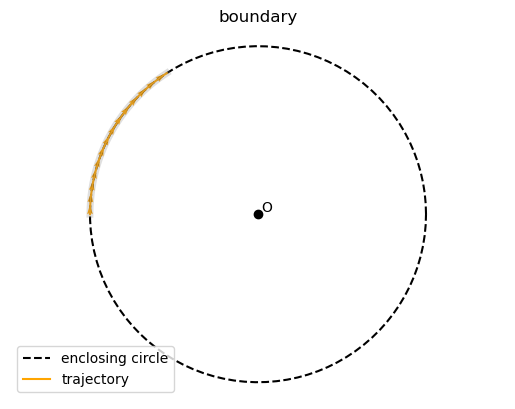

In [512]:
R = 35
png_name = "boundary"
location = 'lower left'
plot_calc_boundary_trajectory(R, png_name, location, reverse = 1.0)

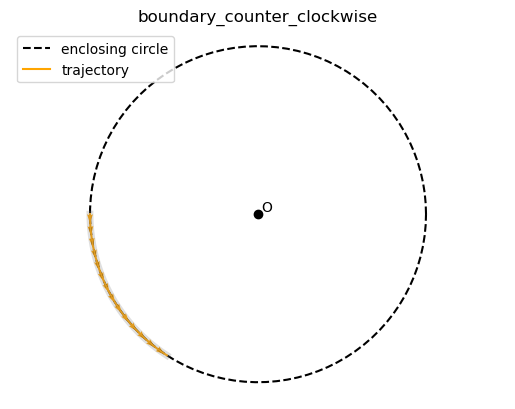

In [513]:
R = 35
png_name = "boundary_counter_clockwise"
location = 'upper left'
plot_calc_boundary_trajectory(R, png_name, location, reverse = -1.0)

In [514]:
from courses.reversal_loop_circle import calc_two_circles_common_tangent_trajectory, calc_tangents_and_points

def plot_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse):
    
    trajectory_1 = calc_boundary_trajectory(R)
    r = 2.0 * R
    trajectory_2 = calc_two_circles_common_tangent_trajectory(R, r, step=0.1)
    trajectory_3 = calc_boundary_trajectory(R)
    r = 0.40 * R
    trajectory_4 = calc_two_circles_common_tangent_trajectory(R, r, step=0.1, amplitude=4.0)

    label_list = ["boundary", "circumcircle", "boundary", "common_tangent"]
    trajectory_list = [trajectory_1, trajectory_2, trajectory_3, trajectory_4]

    start_point = np.array([-R, 0])
    theta = 0.0
    for label, trajectory in zip(label_list, trajectory_list):
        rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        xy = rot @ trajectory.trajectory.T
        plt.plot(xy[0,:], xy[1,:], label = label, linewidth=2.5)
        theta += trajectory.yaw[-1] - trajectory.yaw[0]

    circle_x = R * np.cos(  np.linspace(0.0, 2 * np.pi, 100) ) 
    circle_y = R * np.sin(  np.linspace(0.0, 2 * np.pi, 100) )

    plt.plot( circle_x, circle_y, linestyle='--', color="black", label="enclosing circle")
    # 原点にマーカーを追加
    plt.plot(0, 0, 'o', color='black')  
    plt.text(3.0, 3.0, 'O', fontsize=10, color='black', ha='right', va='top')    
    plt.axis('equal')
    plt.axis('off')
    plt.legend(bbox_to_anchor=(0.85, 1))
    plt.title(png_name)
    plt.savefig(f'{png_name}.png', bbox_inches='tight')
    plt.show()

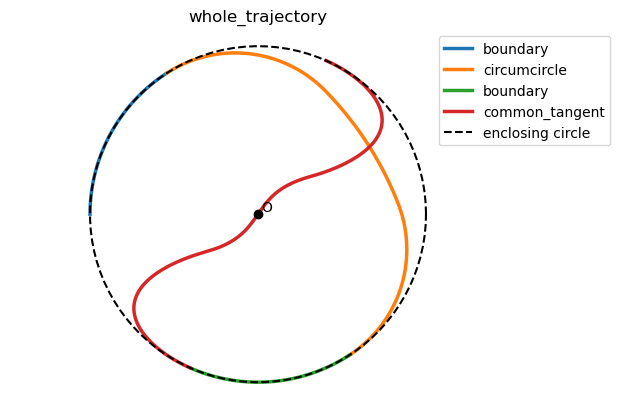

In [515]:
R = 35
r = 0.40 * R
amplitude = 4.0
sine_curve = True
png_name = "whole_trajectory"
reverse = 1.0
location = 'upper left'
plot_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse)

In [623]:
from courses.reversal_loop_circle import calc_two_circles_common_tangent_trajectory, calc_tangents_and_points

def plot_looking_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse):
    
    r = 0.40 * R
    trajectory = calc_two_circles_common_tangent_trajectory(R, r, step=0.1, amplitude=4.0)

    looking_dist = int(30.0/ 0.1)
    start_idx = 50
    
    xy = trajectory.trajectory.T
    plt.plot(xy[0,:start_idx], xy[1,:start_idx], label = "trajectory", linewidth=2.5, alpha = 0.5, color = "blue")
    plt.plot(xy[0,start_idx+looking_dist:], xy[1,start_idx+looking_dist:], linewidth=2.5, alpha = 0.5, color = "blue")
    
    circle_x = R * np.cos(  np.linspace(0.0, 2 * np.pi, 100) ) 
    circle_y = R * np.sin(  np.linspace(0.0, 2 * np.pi, 100) )
    plt.plot(xy[0,start_idx:start_idx+looking_dist]+0, xy[1,start_idx:start_idx+looking_dist]+0, linewidth=4.0, label = "look ahead distance", color = "orange" ) 
    
    dx = np.cos(trajectory.yaw[start_idx+looking_dist])
    dy = np.sin(trajectory.yaw[start_idx+looking_dist])

    plt.quiver( trajectory.trajectory.T[0,start_idx+looking_dist- 10], reverse *trajectory.trajectory.T[1,start_idx+looking_dist-10], dx, dy, angles='xy', scale_units='xy', scale=0.25, width=0.01, color='orange', zorder=3)

    
    plt.plot(xy[0,start_idx]+0, xy[1,start_idx]+0, 'o', color='black')  
    plt.text(xy[0,start_idx]+9.0, xy[1,start_idx]-1.5, 'ego (vehicle)', fontsize=10, color='black', ha='right', va='top')

    plt.text(xy[0,start_idx+int(looking_dist * 0.75)]+20.0, xy[1,start_idx+int(looking_dist * 0.75)]-2.0, 'looking ahead distance', fontsize=10, color='black', ha='right', va='top')

    plt.text(xy[0,-200]+10.0, xy[1,-200]-1.0, 'trajectory', fontsize=10, color='black', ha='right', va='top')

    idx = np.argmax(trajectory.curvature[start_idx:start_idx+looking_dist])
    plt.plot(xy[0,idx]+0, xy[1,idx]+0, '^', color='black', markersize=10)
    plt.text(xy[0,idx]+17.5, xy[1,idx]+1.0, 'max curvature', fontsize=10, color='black', ha='right', va='top')

    plt.axis('equal')
    plt.axis('off')
    #plt.legend(loc = "center right")
    plt.savefig(f'{png_name}.png', bbox_inches='tight')
    plt.show()

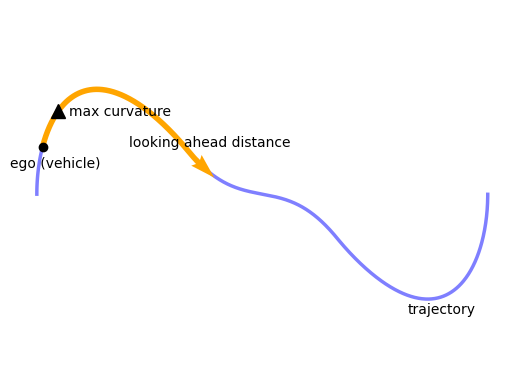

In [624]:
png_name = "looking_ahead"
plot_looking_trajectory(R, r, amplitude, png_name, sine_curve, location, reverse=1)